<a href="https://colab.research.google.com/github/farielshafee2018/Breast-Cancer-Classification/blob/main/Copy_of_shaf_b_cancer_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, the breast cancer data set from sklearn data sets is used to classify breast cancer.  Three different methods for classification is used.

In [ ]:
# import the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# get the data

from sklearn.datasets import load_breast_cancer

# load data

cancer = load_breast_cancer()

In [ ]:
# explore data

cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# get a description of the data set

print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

Data exploration

In [ ]:
cancer['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
data = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
data.shape

(569, 30)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

clean the data

In [ ]:
np.sum(pd.isnull(data))

/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


In [ ]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


find the y column which is whether cancer or not from the target column

In [ ]:
data['cancer'] = cancer['target']
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


plot the data

<Axes: >

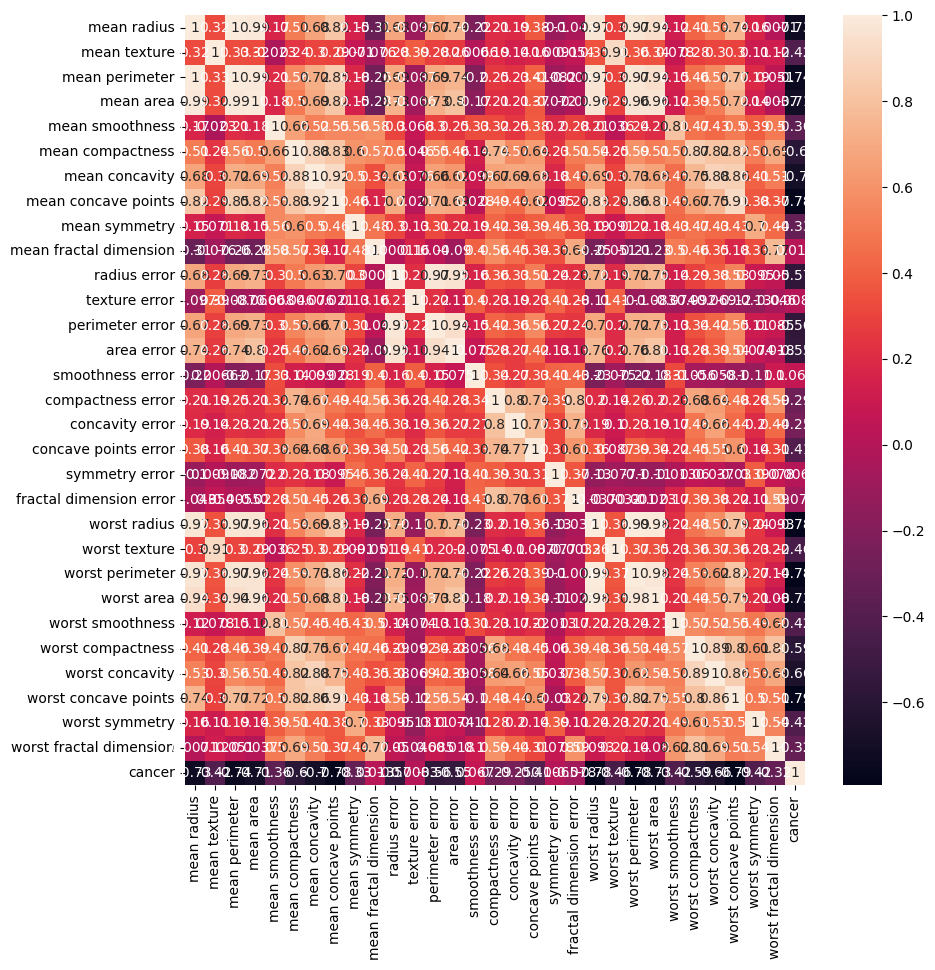

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

<Axes: xlabel='cancer', ylabel='count'>

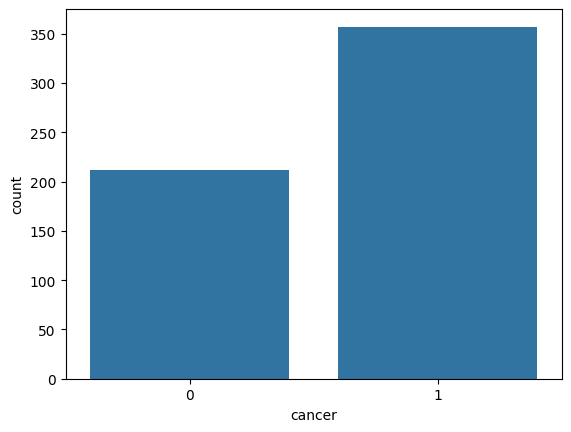

In [ ]:
sns.countplot(x='cancer', data=data)

plot how the means of each feature is correlated with cancer

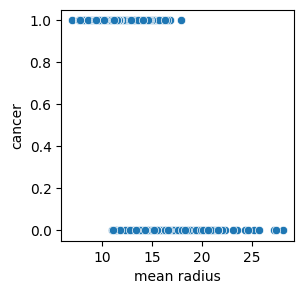

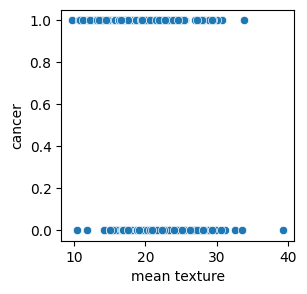

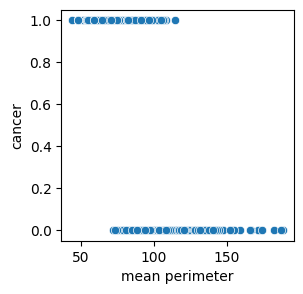

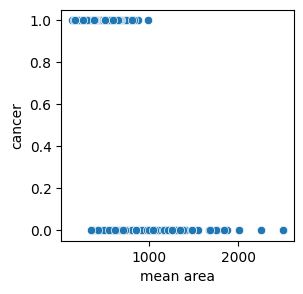

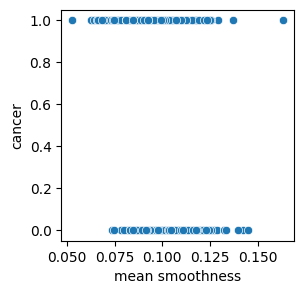

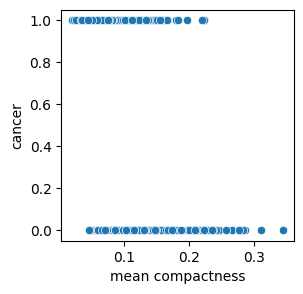

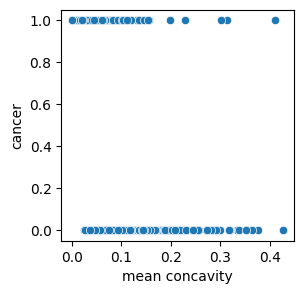

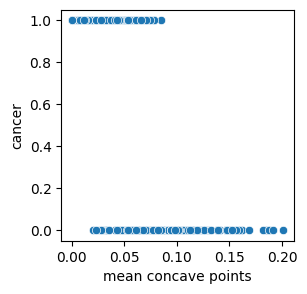

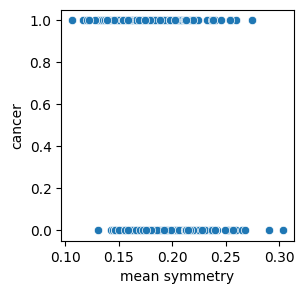

In [ ]:
l = list(data.columns[0:10])
for i in range(len(l)-1):
    plt.figure(figsize=(3,3))
    sns.scatterplot(x=l[i], y='cancer', data=data)


separate x and y

In [ ]:
y = data['cancer']
x = data.drop('cancer', axis=1)
y.head()

,cancer
0,0
1,0
2,0
3,0
4,0


split data into train and test.  Use .4 for split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .4, random_state = 42)
x_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
296,10.91,12.35,69.14,363.7,0.08518,0.04721,0.01236,0.01369,0.1449,0.06031,...,11.37,14.82,72.42,392.2,0.09312,0.07506,0.02884,0.03194,0.2143,0.06643
490,12.25,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,...,14.17,31.99,92.74,622.9,0.12560,0.18040,0.12300,0.06335,0.3100,0.08203
519,12.75,16.70,82.51,493.8,0.11250,0.11170,0.03880,0.02995,0.2120,0.06623,...,14.45,21.74,93.63,624.1,0.14750,0.19790,0.14230,0.08045,0.3071,0.08557
513,14.58,13.66,94.29,658.8,0.09832,0.08918,0.08222,0.04349,0.1739,0.05640,...,16.76,17.24,108.50,862.0,0.12230,0.19280,0.24920,0.09186,0.2626,0.07048
473,12.27,29.97,77.42,465.4,0.07699,0.03398,0.00000,0.00000,0.1701,0.05960,...,13.45,38.05,85.08,558.9,0.09422,0.05213,0.00000,0.00000,0.2409,0.06743


Support Vector Machine Analysis

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)

SVC(kernel='linear')

plot support vector machine

In [ ]:
prediction = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[ 75   5]
 [  4 144]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94        80
           1       0.97      0.97      0.97       148

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228



In [ ]:
# carry out a grid search to find the best parameters

from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(svm.SVC(), param_grid, verbose=3)
grid.fit(x_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.609 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.618 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.618 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=0.618 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.603 total time=   0.1s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.609 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.618 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.618 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.618 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.603 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.609 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [ ]:
#

Use K Neighbor Classifier

In [ ]:
# find best parameters
grid.best_params_

{'C': 100, 'gamma': 0.0001}

In [ ]:
# find the best estimator
grid.best_estimator_

SVC(C=100, gamma=0.0001)

In [ ]:
# find confusion matrix

prediction = grid.predict(x_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[ 72   8]
 [  5 143]]
              precision    recall  f1-score   support

           0       0.94      0.90      0.92        80
           1       0.95      0.97      0.96       148

    accuracy                           0.94       228
   macro avg       0.94      0.93      0.94       228
weighted avg       0.94      0.94      0.94       228



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
# print confusion matrix

prediction = knn.predict(x_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[ 79   1]
 [  8 140]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        80
           1       0.99      0.95      0.97       148

    accuracy                           0.96       228
   macro avg       0.95      0.97      0.96       228
weighted avg       0.96      0.96      0.96       228



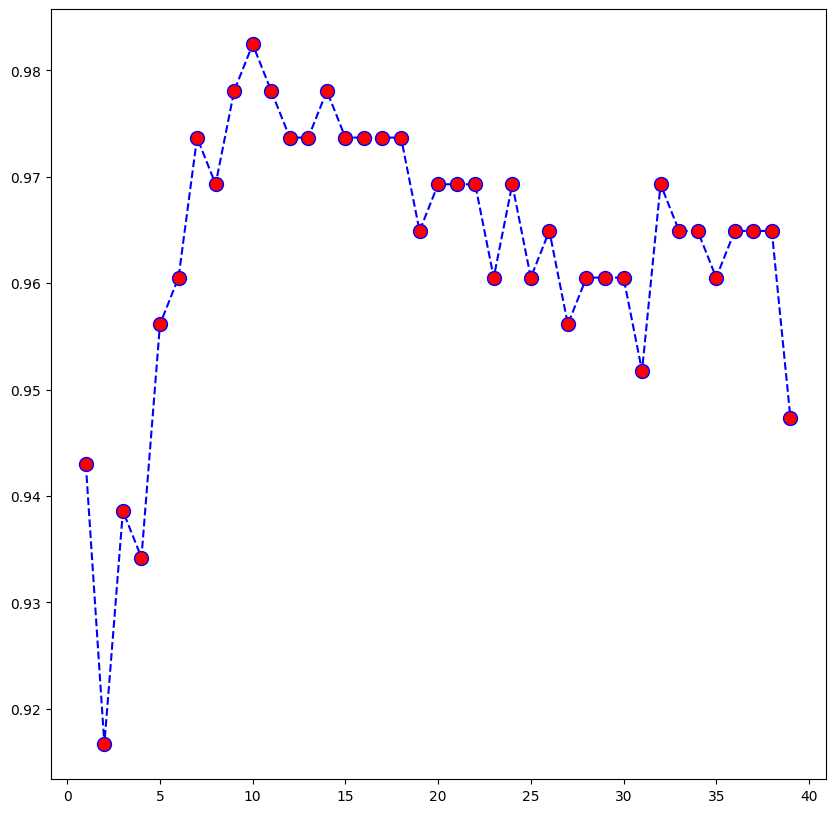

In [ ]:
# try out K neighbors for several n_neighbors using a for loop

error_rate = []
accuracy = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    prediction_i = knn.predict(x_test)
    error_rate.append(np.mean(prediction_i != y_test))
    accuracy.append(np.mean(prediction_i == y_test))

plot = plt.figure(figsize=(10,10))
plt.plot(range(1, 40), accuracy, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)

Decision Tree and Random Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# first try out a single decision tree

dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
# decision tree confusion matric

prediction = dtree.predict(x_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[ 74   6]
 [ 10 138]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        80
           1       0.96      0.93      0.95       148

    accuracy                           0.93       228
   macro avg       0.92      0.93      0.92       228
weighted avg       0.93      0.93      0.93       228



In [ ]:
# now try a random forest

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# print the confusion matrix

prediction = rfc.predict(x_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))


[[ 75   5]
 [  3 145]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        80
           1       0.97      0.98      0.97       148

    accuracy                           0.96       228
   macro avg       0.96      0.96      0.96       228
weighted avg       0.96      0.96      0.96       228



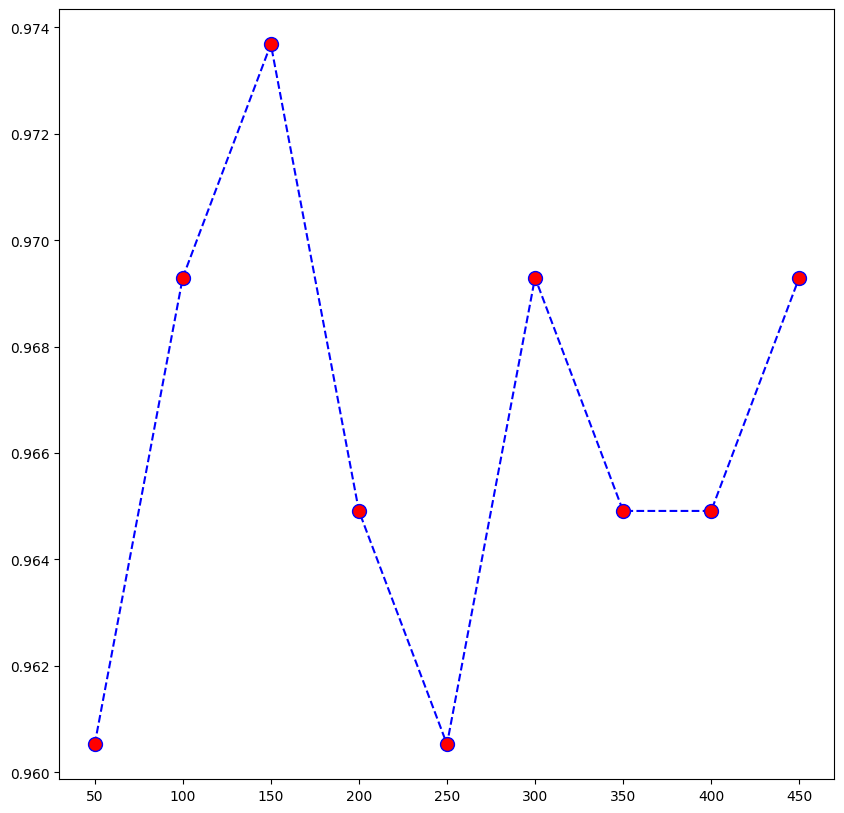

In [ ]:
# now try using random_forest with n_estimator from 20 to 500 and plot accuracy

error_rate = []
accuracy = []
for i in range(50, 500, 50):
    rfc = RandomForestClassifier(n_estimators=i)
    rfc.fit(x_train, y_train)
    prediction_i = rfc.predict(x_test)
    error_rate.append(np.mean(prediction_i != y_test))
    accuracy.append(np.mean(prediction_i == y_test))

plot = plt.figure(figsize=(10,10))
plt.plot(range(50, 500,50), accuracy, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
